In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import openpyxl

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [3]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [4]:
import re

In [5]:
data = pd.read_excel("/Users/idong-geon/Downloads/result_01.xlsx", engine = 'openpyxl')

In [6]:
data.tail(20)

,날짜,본문,댓글,좋아요수
10780,2021-03-19T05:27:54.000Z,•Confit Chicken supreme•Potato fondant•Kale•Ch...,['#food #foodporn #foodie #foodphotography #fo...,<span>6</span>
10781,2021-03-19T05:24:11.000Z,📍오늘회제공고급 오마카세 맛집 스시코우지 후토마키를 집에서🤭역시나 후토마키답게 크기...,"['크기 어마어마🤭', '후토마끼 한입에 쏙쏙 먹고 싶네융😍', '후토마끼도 있네여...",<span>477</span>
10782,2021-03-19T04:58:11.000Z,오랜만에 꼬부기랑 브런치 💚,['#브런치#브런치카페#브런치맛집#크로와상#샌드위치#커피#카페#카페추천#일상#데일리...,<span>50</span>
10783,2021-03-19T05:25:19.000Z,#제품협찬 #베이브와인 #캔와인..거제바다랑 어울리는 베이브와인🍷스파클링 캔와인 베...,"['너무 이쁜데여 사진 느낌', '으아니 울 이트 님 거제 앞바다에서 캔와인으로다가...",<span>182</span>
10784,2021-03-19T05:23:17.000Z,"⠀⠀⠀⠀ 매일 아침에 바쁘면 항상 누룽지 먹고 다녔는데,얼마전에 엄마가 또 누룽지를...","['🍳', '저도 누룽지 너무너무 좋아해용 😍', '선팔했어요 💓 우리 먹소통해요 ...",<span>86</span>
10785,2021-03-19T05:23:07.000Z,🍓,['#좋아요#좋아요반사#팔로우미#좋아요그램맛집스타그램#옷스타그램#코스메틱#일상패션#...,<span>79</span>
10786,2021-03-19T05:22:13.000Z,#쪼꼼이새댁🎀#20210319 fri ☀️#조동모임 #84클럽 🥂🍾#chan스토랑🍽...,"['언니....배우러가도되나요... (진심)', '예린맘님 84년생이셨어요? 저두요...",<span>127</span>
10787,2021-03-19T05:19:22.000Z,"ㅡ정기 시식 및 시연, 촬영ㅡ#고잉메리xGS리테일 #요괴테스트키친x심플리쿡 #심플리...","['우리 소통해요', '이거 진짜 맛있어보이는데요😍😍👏👏']",<span>57</span>
10788,2021-03-19T05:18:49.000Z,Sushi box...#sashimi #foodstagram #foodblog #f...,"['우와 진짜 비주얼대박이에요😍😍 세상에나❤️', '하나들고 소풍가고 싶어요😍', ...",<span>325</span>
10789,2021-03-19T05:17:56.000Z,#오늘 #점심 #밥상 #추어탕 #추어튀김 #추오정남원추어탕 #뜨끈한국물 #든든한끼 ...,[],<span>17</span>


In [7]:
data.shape

(10800, 4)

In [8]:
print(data.iloc[1,2])

['\U0001f9e1', '안그래도 냄비 바꾸고 싶었는데 오늘 똬악!!! ㅎㅎ 혹시 사각팬 뚜껑은 공구예정 없으실까요?', '사각팬은 열전달이 고루 안된다고 들은적이 있는데 괜찮나용...??', '가격이  저렴하니  머라도 사야되서  밥솥  주문했네요~~안  산게  업다.. 여태껏  거의다  샀어요...잘한거죠 ㅋㅋㅋ', '뚝배기 구매해서 결제가 되었는데요  지금 품절 뜬거 아니면 배송이 오는거겠죠?? 코스트코에서 고민하던 아이템 잘 건져갑니다 ㅋㅋ', '동미님 첫번째 영상에나오는게 옵션2번인가요? 첫번째랑 두번째랑 헷갈려서요😢', '스텐 뒤집개 정보 좀 부탁드려요. 🙏', '정말로 기가 맥히구만 파전도 사각팬도 끝내줘요😍😍', '전직이 동래파전집 사장님 이셨어요?😍👍🏻', '와 진짜 여기 종로에 전집들 유명한데 동미님 오셔서 동미파전집 오픈 좀 해주셔요🙈 이번공구도 대박행진! 멋져요👏🏼', '영상에 빨려들어갈뻔ㅠ 소리까지 너무 맛있어 보여요❤️❤️', '사고싶다사고싶다 혼자 중얼거리고 있어요🌿']


In [9]:
print(data.iloc[10,1])

🍒 꽃바람세트 🍒⏰ 공구기간 : 3월 23일 마감🚚 배송 : 3/30(화) - 4/2(금) 순차발송  (수량이 많으면 7~10일 지연될 수 있습니다)➰ 주문 방법-  @bbommii_bebe 프로필 하단 링크‘Style 상품탭’에서 구매 가능!➰ 구  성맨투맨+반바지 2종세트➰ C O L O R블랙, 라임, 민트, 블루, 옐로우, 핑크, 퍼플➰ S I Z E3,5,7,9,11,13,15,17호➰ M O D E L S I Z E85cm 13kg 5호착용♥️ 1:1 오더 시스템으로 주문후, 교환/환불/취소 불가능합니다♥️ 상품별 공지사항 꼭 확인해주세요.♥️ 배송지연으로 인한 취소 불가능합니다.#맞팔 #선팔 #좋아요 #인친 #소통 #아이폰 #팔로우 #selca #일상 #iphone #셀스타그램 #selfie #훈스타그램 #셀기꾼 #데일리 #ootd#셀카 #오오티디 #기록 #직장인스타그램 #친스타그램 #인스타푸드 #먹스타그램 #맛스타그램 #좋아요늘리기 #팔로우늘리기


In [10]:
tag = re.compile( "#([0-9a-zA-Z가-힣]*)")
tag.findall(data.iloc[0,0])


[]

In [11]:
tag_list = []
list_found = tag.findall(data.iloc[1,1])
tag_list.extend(list_found)

print(tag_list)

['쿡에버', '동미파전', '쿡에버', '앱솔루트사각팬', '수량안내', '뚝배기사이즈안내', '동미동영상', '동미공구', '요리동영상', '레시피', '파전', 'cookingvideo', '뚝배기추천', '후라이팬', '살림', '주방템']


In [12]:
name_dict = dict()

def find_same_count(a):    
    
    for x in a:
        if x in name_dict:
            name_dict[x] += 1
        else:
            name_dict[x] = 1
    
    return name_dict

In [13]:
find_same_count(tag_list)

{'쿡에버': 2,
 '동미파전': 1,
 '앱솔루트사각팬': 1,
 '수량안내': 1,
 '뚝배기사이즈안내': 1,
 '동미동영상': 1,
 '동미공구': 1,
 '요리동영상': 1,
 '레시피': 1,
 '파전': 1,
 'cookingvideo': 1,
 '뚝배기추천': 1,
 '후라이팬': 1,
 '살림': 1,
 '주방템': 1}

In [14]:
dic=find_same_count(tag_list)

In [15]:
df = pd.DataFrame.from_dict(dic,orient = 'index')

In [16]:
# 정규표현식 사용
tag = re.compile( "#([0-9a-zA-Z가-힣]*)")

# 정규표현식 검토
tag.findall(data.iloc[14,1])

[]

In [17]:
# 칼럼 10^4 개 돌려서 tag_list 배열에 합치기
tag_list = []
for i in range(10000):
    list_found = tag.findall(str(data.iloc[i,1]))
    tag_list.extend(list_found)

In [18]:
# 딕셔너리로 갯수 세는 함수 만들기
name_dict = dict()

def find_same_count(a):    
    
    for x in a:
        if x in name_dict:
            name_dict[x] += 1
        else:
            name_dict[x] = 1
    
    return name_dict

In [19]:
# 함수 돌리기
dic = find_same_count(tag_list)

In [20]:
# 판다스 데이터 프레임으로 저장
df = pd.DataFrame.from_dict(dic,orient = 'index')

In [21]:
df

,0
백점아빠김밥,1
김밥,79
집김밥,17
도시락,55
쿡에버,9
...,...
도토리다방,1
비비해이,1
쌀쌀맞은닭구운치킨에,1
필수템먹방후,1


In [22]:
df_20 = df[df[0]>=300]

In [23]:
df_20

,0
한식,529
인스타푸드,4846
온더테이블,984
instafood,1644
foodstagram,907
onthetable,479
daily,610
dinner,387
맞팔,760
선팔,406


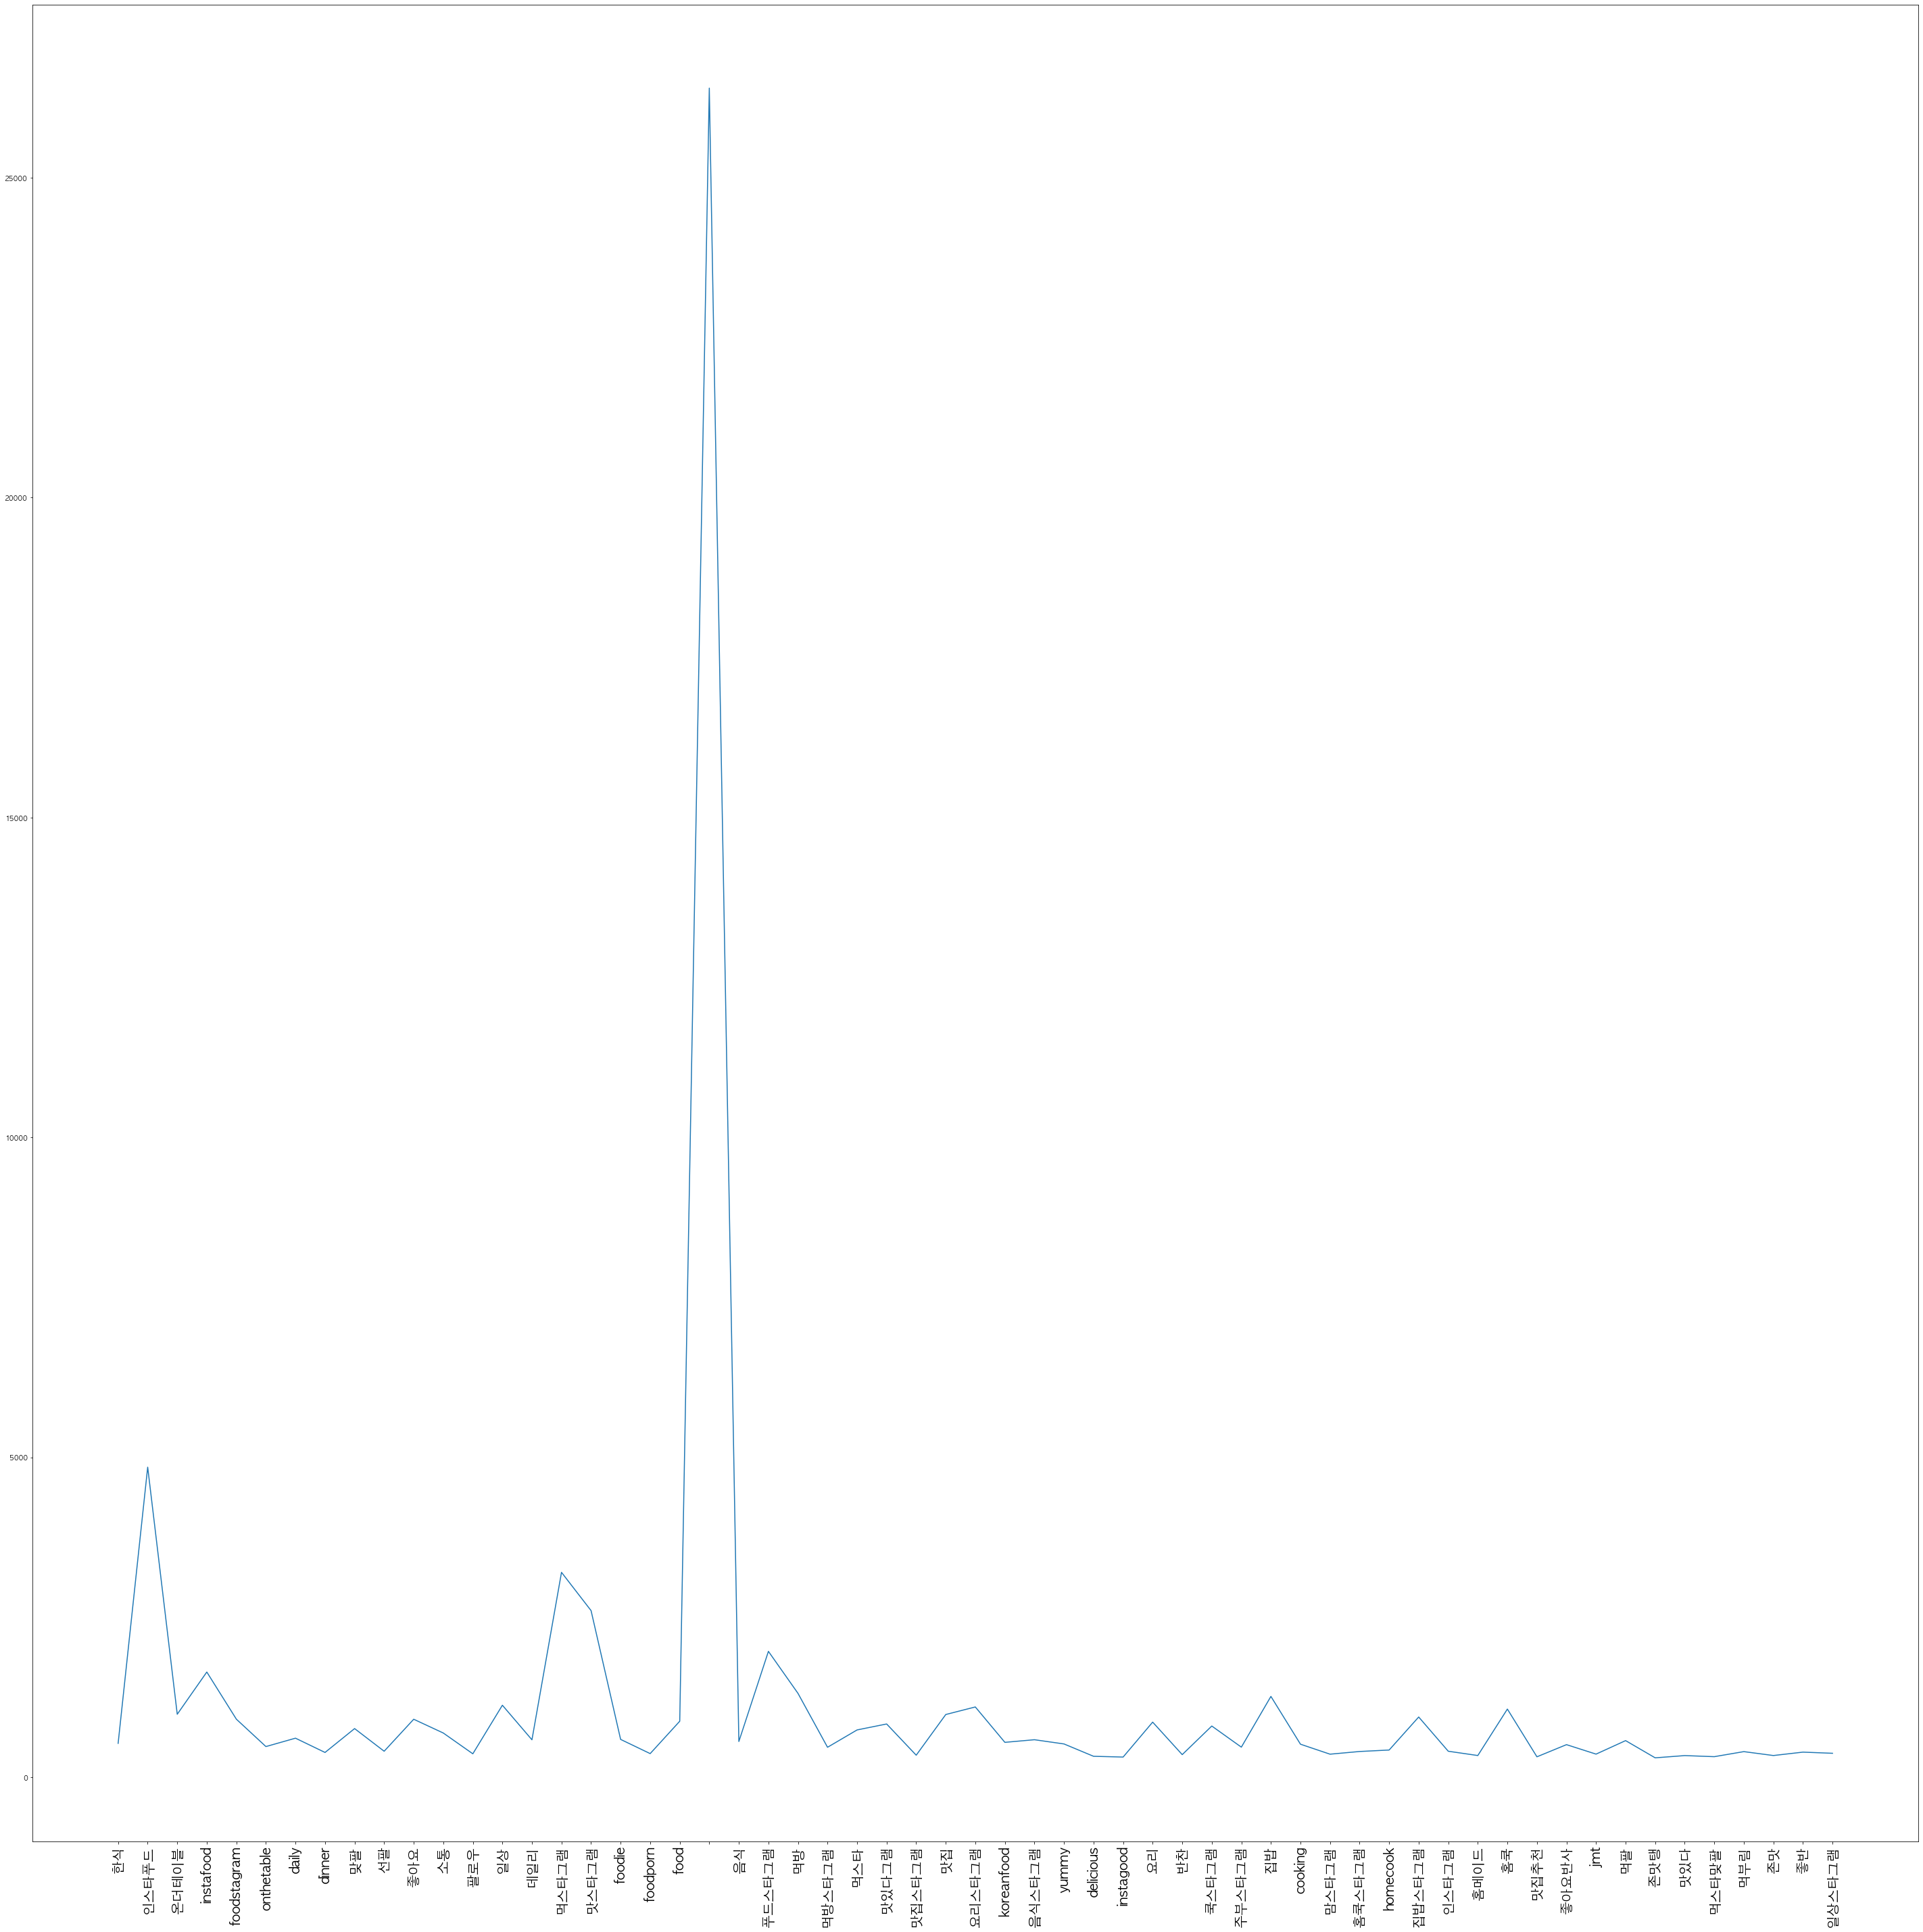

In [24]:
plt.figure(figsize=(50,50))
plt.plot(df_20.index,df_20[0])
plt.xticks(rotation = 90)
plt.xticks(size=20)
plt.show()